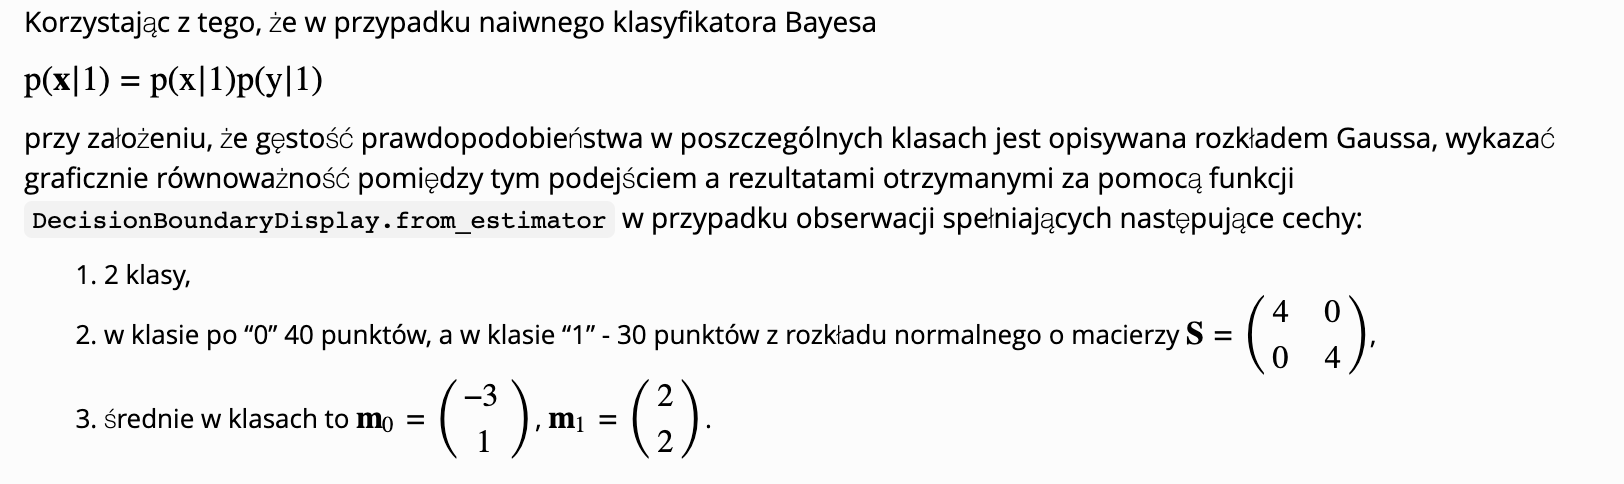

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
import scipy.stats

In [54]:
def draw_data(n0, n1, m0, m1, S):

    data0 = np.random.multivariate_normal(m0, S, n0)
    data1 = np.random.multivariate_normal(m1, S, n1)

    data = np.concatenate((data0, data1), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])

    data["klasa"] = np.repeat([0, 1], [n0, n1])
    
    return data

# średnie w klasach
m0, m1 = [-3, 1], [2, 2]
#rozkład normalny o macierzy s
S = [[4, 0], [0, 4]]
#liczba wystąpień w klasie
n0, n1 = 40, 30

data = draw_data(n0, n1, m0, m1, S)

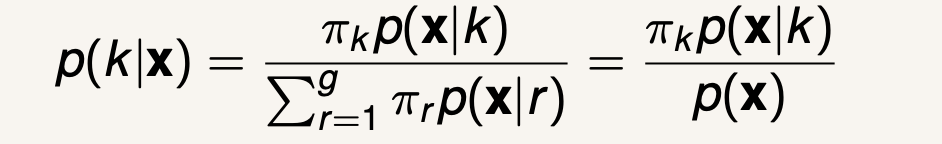

In [55]:
#proba belonging to class 0
def manual_bayes(data, pi0, pi1, mean_x0, mean_y0, mean_x1, mean_y1, std_x0, std_y0, std_x1, std_y1):
    up =  pi0 * scipy.stats.norm.pdf(data["x"], mean_x0, std_x0) * scipy.stats.norm.pdf(data["y"], mean_y0, std_y0)
    down = ( up
        + pi1 * scipy.stats.norm.pdf(data["x"], mean_x1, std_x1) * scipy.stats.norm.pdf(data["y"], mean_y1, std_y1)
)
    return up/down

In [56]:
nb = GaussianNB()
nb.fit(data[["x","y"]], data.klasa)

GaussianNB()

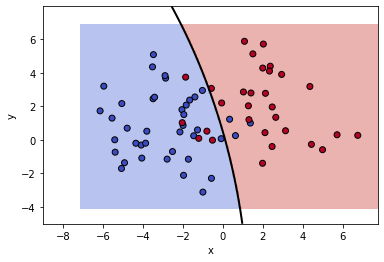

In [57]:
disp = DecisionBoundaryDisplay.from_estimator(nb, data[["x","y"]], response_method="predict", 
                                              alpha=0.4, cmap=plt.cm.coolwarm, grid_resolution=200)
x, y = np.mgrid[-9:5:.05, -5:8:.05]
data_grid = pd.DataFrame({'x': x.ravel(), 'y': y.ravel()})
nn = n0 + n1
mean_x0 = data[data["klasa"]==0]["x"].mean()
mean_y0 = data[data["klasa"]==0]["y"].mean()
mean_x1 = data[data["klasa"]==1]["x"].mean()
mean_y1 = data[data["klasa"]==1]["y"].mean()
std_x0 = data[data["klasa"]==0]["x"].std()
std_y0 = data[data["klasa"]==0]["y"].std()
std_x1 = data[data["klasa"]==1]["x"].std()
std_y1 = data[data["klasa"]==1]["y"].std()

S = data.groupby("klasa").cov()

bay = manual_bayes(data_grid, n0/nn, n1/nn, mean_x0, mean_y0, mean_x1, mean_y1, std_x0, std_y0, std_x1, std_y1).reshape(x.shape)


plt.scatter(data.x, data.y, c=data["klasa"], edgecolor="k", cmap=plt.cm.coolwarm)
plt.contour(x, y, bay, [0.5],  linewidths=2.0, colors="black")                                            
                                    
plt.show()